# Streamlit

In [1]:
import pandas as pd

In [2]:
AFD_poll = 10.61
CDU_poll = 21.97
FDP_poll = 10.33
GRUENE_poll = 19.69
LINKE_poll = 7.11
SPD_poll = 19.59
OTHER_poll = 10.7

In [3]:
AFD_poll + CDU_poll + FDP_poll + GRUENE_poll + LINKE_poll + SPD_poll + OTHER_poll

100.0

In [36]:
df = pd.read_csv("../../raw_data/df_merged.csv")

In [37]:
df = df[df["created_at"]=="2021-08-23"]

In [38]:
df.drop(columns=["created_at", "Polls"], inplace=True)

In [39]:
df = df[['party', 'replies_count', 'retweets_count',
       'likes_count', 'avg_len_of_tweet', 'share_of_tweets',
       'share_unique_users']]

In [8]:
df.iloc[[0]][['replies_count', 'retweets_count',
       'likes_count', 'avg_len_of_tweet', 'share_of_tweets',
       'share_unique_users']]

,replies_count,retweets_count,likes_count,avg_len_of_tweet,share_of_tweets,share_unique_users
629,14.0,6.0,34.0,191.638298,0.137427,0.702128


In [9]:
twitter_kpis = df.to_dict('r')

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_2253/3479158480.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  twitter_kpis = df.to_dict('r')


In [10]:
tweets = pd.read_csv("/Users/philippheitmann/Downloads/2021_0723-0826_Tweets_Linken_sentiment.csv")

In [11]:
tweets.columns

Index(['Unnamed: 0', 'tweet_created_at', 'text', 'author_id', 'lang',
       'tweet_id', 'source', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'profile_created_at', 'username', 'name',
       'public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'location',
       'withheld.copyright', 'withheld.country_codes_x', 'withheld.scope_x',
       'withheld.country_codes_y', 'withheld.scope_y', 'sentiment'],
      dtype='object')

In [12]:
test = tweets[['text',"tweet_created_at",'public_metrics.retweet_count','public_metrics.reply_count', 'public_metrics.like_count', 'sentiment']]

In [13]:
test.iloc[[test["public_metrics.retweet_count"].idxmax()]]

,text,tweet_created_at,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,sentiment
13014,Hamburger @dieLinke Politiker gratuliert den T...,2021-08-17T13:46:03.000Z,633,145,2036,neutral


## Get most popular tweets (negative and positive per party)

In [14]:
pos = test[test["sentiment"]=="positive"].reset_index()

In [15]:
pd.set_option('display.max_colwidth', None)

In [16]:
pos_most_likes = pos.iloc[[pos["public_metrics.retweet_count"].idxmax()]].to_dict('r')[0]

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_2253/3217425513.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  pos_most_likes = pos.iloc[[pos["public_metrics.retweet_count"].idxmax()]].to_dict('r')[0]


In [17]:
pos_most_rewteets = pos.iloc[[pos["public_metrics.like_count"].idxmax()]].to_dict('r')[0]

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_2253/4179520516.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  pos_most_rewteets = pos.iloc[[pos["public_metrics.like_count"].idxmax()]].to_dict('r')[0]


In [18]:
pos_most_rewteets

{'index': 2420,
 'text': 'Viele #Linke hier auf Twitter reden zwar von Toleranz und Vielfalt und fordern genau das auch ein, leben aber das ganze Gegenteil davon aus. Immer wieder eine bemerkenswerte Feststellung.',
 'tweet_created_at': '2021-08-25T18:05:45.000Z',
 'public_metrics.retweet_count': 109,
 'public_metrics.reply_count': 32,
 'public_metrics.like_count': 948,
 'sentiment': 'positive'}

In [19]:
neg = test[test["sentiment"]=="negative"].reset_index()
neg_most_likes = neg.iloc[[neg["public_metrics.like_count"].idxmax()]].to_dict('r')[0]

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_2253/895142886.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  neg_most_likes = neg.iloc[[neg["public_metrics.like_count"].idxmax()]].to_dict('r')[0]


In [20]:
neg_most_retweets = neg.iloc[[neg["public_metrics.retweet_count"].idxmax()]].to_dict('r')[0]

/var/folders/r8/ml9zphbs05z5wx9ykw9g7r_40000gn/T/ipykernel_2253/2968418806.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  neg_most_retweets = neg.iloc[[neg["public_metrics.retweet_count"].idxmax()]].to_dict('r')[0]


In [21]:
neg_most_retweets 

{'index': 14464,
 'text': 'Sich über den Tod von 37 Bundeswehrsoldaten in #Afganisten zu freuen…. Einfach ekelhaft, was dieser Funktionär (Bijan Tavasolli) @DieLinke_HH  von sich gibt! https://t.co/NE9LxsJuvb',
 'tweet_created_at': '2021-08-16T08:58:49.000Z',
 'public_metrics.retweet_count': 521,
 'public_metrics.reply_count': 148,
 'public_metrics.like_count': 1589,
 'sentiment': 'negative'}

In [22]:
{"pos_most_likes": pos_most_likes, "pos_most_rewteets": pos_most_rewteets, "neg_most_likes": neg_most_likes, "neg_most_retweets": neg_most_retweets}

{'pos_most_likes': {'index': 2420,
  'text': 'Viele #Linke hier auf Twitter reden zwar von Toleranz und Vielfalt und fordern genau das auch ein, leben aber das ganze Gegenteil davon aus. Immer wieder eine bemerkenswerte Feststellung.',
  'tweet_created_at': '2021-08-25T18:05:45.000Z',
  'public_metrics.retweet_count': 109,
  'public_metrics.reply_count': 32,
  'public_metrics.like_count': 948,
  'sentiment': 'positive'},
 'pos_most_rewteets': {'index': 2420,
  'text': 'Viele #Linke hier auf Twitter reden zwar von Toleranz und Vielfalt und fordern genau das auch ein, leben aber das ganze Gegenteil davon aus. Immer wieder eine bemerkenswerte Feststellung.',
  'tweet_created_at': '2021-08-25T18:05:45.000Z',
  'public_metrics.retweet_count': 109,
  'public_metrics.reply_count': 32,
  'public_metrics.like_count': 948,
  'sentiment': 'positive'},
 'neg_most_likes': {'index': 29962,
  'text': 'Linker Bundestagsabgeordneter solidarisiert sich mit rechtem Schwurbelblogger.\n\nIst das ok für die

## Get Twitter KPIs

In [48]:
# Get share of tweets per party 
shares = df[["party", "share_of_tweets"]]

In [49]:
df.party.to_list()

['AFD', 'CDU', 'FDP', 'GRUENE', 'LINKE', 'SPD']

In [50]:
df.share_of_tweets.to_list()

[0.0522163097328894,
 0.4455686911845657,
 0.065506304228158,
 0.2069516894282943,
 0.0544706283257752,
 0.1752863771003171]

In [54]:
shares

,party,share_of_tweets
623,AFD,0.052216
624,CDU,0.445569
625,FDP,0.065506
626,GRUENE,0.206952
627,LINKE,0.054471
628,SPD,0.175286


In [58]:
import numpy as np

<AxesSubplot:>

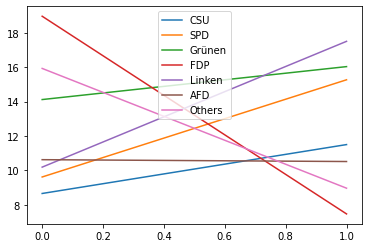

In [73]:
pd.DataFrame(np.random.uniform(5, 20, size=(2,7)), columns=["CSU", "SPD", "Grünen", "FDP", "Linken", "AFD", "Others"]).plot()

In [90]:
np.random.seed(2021)
N = 10
rng = pd.date_range(start='2021-08-16', end='2021-08-25')
df = pd.DataFrame(np.random.uniform(5, 20, size=(10,14)), columns=["CSU", "SPD", "Grünen", "FDP", "Linken", "AFD", "Others", "CSU_poll", "SPD_poll", "Grünen_poll", "FDP_poll", "Linken_poll", "AFD_poll", "Others_poll"], index=rng)

In [91]:
df

,CSU,SPD,Grünen,FDP,Linken,AFD,Others,CSU_poll,SPD_poll,Grünen_poll,FDP_poll,Linken_poll,AFD_poll,Others_poll
2021-08-16,14.089674,16.000540,7.084207,9.690096,19.958649,6.922436,7.684897,16.293881,14.932408,16.764652,6.453416,5.878569,19.435940,14.248362
2021-08-17,6.299449,13.419085,14.247871,19.457645,13.614564,10.567413,11.782179,8.027754,13.539577,7.926440,13.755560,12.144702,12.767216,17.346480
2021-08-18,15.983375,6.035844,15.081934,14.652272,17.420216,8.067041,14.262334,14.265515,9.516029,18.076109,13.844811,19.726551,11.633484,6.894765
2021-08-19,12.632464,11.476793,18.739093,15.635235,18.359831,13.833284,14.552449,10.133134,17.356868,9.577262,9.613152,8.019840,8.977474,14.763856
2021-08-20,7.319222,10.830492,14.714212,17.724487,5.957547,11.216618,9.983664,15.819815,12.107710,16.979620,6.363004,18.118352,16.654653,16.573496
2021-08-21,5.946550,13.916577,16.887421,9.112005,10.565297,17.796718,15.180934,16.315662,11.258859,9.813481,10.584446,9.130283,15.193334,13.724397
2021-08-22,19.552982,11.232606,9.957336,19.500712,17.388486,9.581003,17.349169,13.353657,15.777515,18.199054,12.440151,12.681295,14.728182,10.149899
2021-08-23,14.339560,11.968995,6.857599,19.701813,11.786272,6.762495,17.300030,7.626953,8.460473,15.572261,15.764716,7.223724,10.905234,17.039272
2021-08-24,17.152829,16.940042,17.869842,9.451104,7.382654,15.292147,16.003178,7.220085,9.000198,10.736106,12.553377,14.857442,16.278864,6.012228
2021-08-25,8.164455,15.111102,18.458443,16.431723,17.246483,14.142981,13.860450,17.818012,14.489825,18.026176,11.246294,14.861194,18.581214,6.202774


In [62]:
import matplotlib.pyplot as plt

In [69]:
chart_data = pd.DataFrame(np.random.randn(20,3))

In [70]:
plt.bar(chart_data)

TypeError: bar() missing 1 required positional argument: 'height'

# API

In [19]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [522]:
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id',
                    'tweet.fields': 'id,text,created_at,lang,public_metrics,source',
                    'user.fields': 'id,created_at,location,public_metrics',
                    'place.fields': 'full_name,country_code,geo,place_type',
                    'next_token': {}}
    return (search_url, query_params)

In [368]:
def connect_to_endpoint(url, headers, params, next_token):
    
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [355]:
#Inputs for the request
bearer_token = os.getenv('TOKEN')
headers = {"Authorization": f"Bearer {bearer_token}"}
keyword = query
start_time = "2021-08-02T00:00:00.000Z"
end_time = "2021-08-25T00:00:00.000Z"
max_results = 500

In [353]:
query = """(@cducsubt OR @CDU OR @ArminLaschet  OR #Laschet OR #ArminLaschet  OR #arminlaschet OR #laschet OR #cdu OR #CDU OR eCDU/CSU OR Laschet)
lang:de -is:retweet
-#GRUENEN -@Die_Gruenen -Baerbock -@ABaerbock
-#SPD -@spdde -Scholz -@OlafScholz
-#AFD -@AfD -Weidel -@Alice_Weidel -Chrupalla -@Tino_Chrupalla
-#FDP -@fdp -Lindner -@c_lindner
-#DieLinke -@dieLinke -Wissler -@Janine_Wissler -Bartsch -@DietmarBartsch
-#FreieWaehler -@FREIEWAEHLER_BV
-#diePARTEI -@DiePARTEI
-@Tierschutzparte -NPD -@Piratenpartei -#Piraten -#dieBasis -@diebasispartei -#Volt -@VoltDeutschland"""

In [228]:
# One call with above defined params
url = create_url(keyword, start_time,end_time, max_results)
response = connect_to_endpoint(url[0], headers, url[1], token2)

Endpoint Response Code: 200


In [340]:
final_df = pd.DataFrame()

In [623]:
counter = 0

In [578]:
def fetch_tweets(headers, keyword, start_time, end_time, max_results, tweet_amount, new_token=None):
    
    start = time.time()
    
    global counter
    # increase counter by number of fetched tweets
    counter += max_results
    
    # if too many tweets are fetched end search early to avoid exceeding tweets per month limit
    if counter > tweet_amount:
        print("Reached search limit")
        counter = 0
        return None
    
    # create url
    url = create_url(keyword, start_time, end_time, max_results)
    
    # call api
    response = connect_to_endpoint(url[0], headers, url[1], new_token)
    
    #response has 3 keys: 
    #"data": tweet information in a dict
    #"includes": dict with one key "users" which is a dict of user information
    #"meta": api request information
    
    # create first DataFrame out of tweet response key
    tweet_df = pd.json_normalize(response["data"])
    
    # rename columns to not get identical names with user_df
    tweet_df.rename(columns={'id':'tweet_id', 
                             'created_at': "tweet_created_at"}, 
                    inplace=True)
    
    # create second DataFrame out of user response key
    user_df = pd.json_normalize(response["includes"]["users"])
    
    # rename columns to not get identical names with tweet_df
    user_df.rename(columns={'id':'author_id',
                            'created_at': "profile_created_at"}, 
                    inplace=True)
    
    # merge two dataframes into one
    merged_df = tweet_df.merge(user_df, how = "outer", on="author_id")
    
    #sentiment = model.predict_sentiment(list(merged_df.text))
    
    #merged_df["sentiment"] = sentiment

    global final_df
    # concat the current search DataFrame with a result df outside of the function
    final_df = pd.concat([final_df, merged_df], ignore_index=True)
    
    end = time.time()
    print(end - start)
    # break if token == None --> no more results for the search query
    # otherwise call itself again this time after waiting 6 seconds 
    # to not exceed api call limit per 15 minutes
    
    if response["meta"].get("next_token", None):
        
        # get new token for consecutive search, returns None if search finished
        next_token = response["meta"]["next_token"]
        # sleep to not exceed api call limit
        time.sleep(3)
        fetch_tweets(headers, keyword, start_time, end_time, max_results, tweet_amount, next_token)
        #bearer_token, headers, keyword, start_time, end_time, max_results, 
    
    
    return None

In [5]:
if not []:
    print("True")

True


In [659]:
# Calls function with variables params defined above 
fetch_tweets(headers, keyword, start_time, end_time, max_results, tweet_amount=500)

Endpoint Response Code: 200
0.9854757785797119
Reached search limit


In [332]:
pd.json_normalize(response["data"])

1

In [338]:
tu = pd.json_normalize(response["includes"]["users"])

In [318]:
qwe = pd.json_normalize(response["data"])

In [325]:
qwe = qwe.merge(pd.json_normalize(response["includes"]["users"]), how="outer", left_on="author_id", right_on="id")

In [327]:
qwe.columns

Index(['lang', 'author_id', 'created_at_x', 'id_x', 'source', 'text',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count', 'id_y',
       'username', 'name', 'created_at_y', 'public_metrics.followers_count',
       'public_metrics.following_count', 'public_metrics.tweet_count',
       'public_metrics.listed_count', 'location'],
      dtype='object')

In [324]:
pd.json_normalize(response["includes"]["users"])

,id,username,name,created_at,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,location
0,14453739,Slow3000,Michael,2008-04-20T18:26:21.000Z,254,858,10573,7,NaN
1,1213365713533988865,kristy_jmppl,Kristina,2020-01-04T07:45:15.000Z,3,4,57,0,Deutschland
2,1263393503956078592,kotzlpotzl,Kotzlpotzl,2020-05-21T08:58:58.000Z,138,326,17399,5,NaN
3,1187450599983472645,Weberameise1,Weberameise,2019-10-24T19:28:02.000Z,348,295,77192,1,Deutschland
4,749750503169466368,lepoetico,Andre Miller,2016-07-03T23:43:44.000Z,158,324,9887,1,NaN
5,55563609,PeterDroegemeie,Peter Drögemeier ☀️,2009-07-10T13:41:46.000Z,2305,3771,86046,9,"Münster, Deutschland"
6,768064268625383424,Inselkind16,Hedy Dalmer,2016-08-23T12:36:06.000Z,2519,4056,56649,3,Mecklenburg-Vorpommern
7,349158227,BrunoBrozek,Bruno Brozek 🇮🇱✡️☮️☯️❣️🔴🔴,2011-08-05T17:08:05.000Z,554,3109,19074,0,NaN
8,1014608590131335169,NeoLink8420,NeoLink,2018-07-04T20:35:13.000Z,1,71,448,0,NaN
9,760881621113397248,PeterDusburg,Peter Dusburg,2016-08-03T16:54:49.000Z,37,43,7394,5,NaN


In [319]:
qwe

,lang,author_id,created_at,id,source,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,de,14453739,2021-08-24T23:51:36.000Z,1430316893752209408,Twitter for iPhone,RT @Lam3th: Wie kommen wir alle gesund durch d...,551,0,0,0
1,de,1213365713533988865,2021-08-24T23:51:34.000Z,1430316886303064065,Twitter for iPhone,RT @Der_Postillon: Glück gehabt: CDU muss nich...,793,0,0,0
2,de,1263393503956078592,2021-08-24T23:51:03.000Z,1430316756833382400,Twitter for Android,RT @kaffeecup: Mit ihm als Kanzler werde es ke...,68,0,0,0
3,de,1187450599983472645,2021-08-24T23:50:19.000Z,1430316573735202825,Twitter Web App,RT @Wolfgan39555363: @phoenix_de @Weberameise1...,1,0,0,0
4,de,749750503169466368,2021-08-24T23:49:56.000Z,1430316477333348358,Twitter for Android,"RT @Procyon25: CDU-Wahlplakat: \n""Wählt CDU! U...",8,0,0,0
5,de,55563609,2021-08-24T23:49:34.000Z,1430316383406071816,Twitter Web App,RT @saki_statement: Januar 2021:\nLaschet wird...,119,0,0,0
6,de,768064268625383424,2021-08-24T23:49:29.000Z,1430316363793453066,Twitter Web App,RT @Kall90384061: @lisapaus @CDU @fdp @sven_ki...,21,0,0,0
7,de,349158227,2021-08-24T23:49:13.000Z,1430316293958381575,Twitter for Android,RT @BrunoBrozek: Warum ist die @Regierung17 ni...,4,0,0,0
8,de,1014608590131335169,2021-08-24T23:49:08.000Z,1430316272701612036,Twitter for Android,@andreasscheuer CDU steht für vollversagen bei...,0,0,0,0
9,de,760881621113397248,2021-08-24T23:49:04.000Z,1430316258571034626,Twitter Web App,@dieparteimfr @ArminLaschet @CDU Zu 1. Hat Ein...,0,0,0,0


In [315]:
for i in range(len(max_len)):
    response["data"][i]["public_metrics"]

TypeError: list indices must be integers or slices, not str

In [320]:
pd.DataFrame(response["data"])

,public_metrics,lang,author_id,created_at,id,source,text
0,"{'retweet_count': 551, 'reply_count': 0, 'like...",de,14453739,2021-08-24T23:51:36.000Z,1430316893752209408,Twitter for iPhone,RT @Lam3th: Wie kommen wir alle gesund durch d...
1,"{'retweet_count': 793, 'reply_count': 0, 'like...",de,1213365713533988865,2021-08-24T23:51:34.000Z,1430316886303064065,Twitter for iPhone,RT @Der_Postillon: Glück gehabt: CDU muss nich...
2,"{'retweet_count': 68, 'reply_count': 0, 'like_...",de,1263393503956078592,2021-08-24T23:51:03.000Z,1430316756833382400,Twitter for Android,RT @kaffeecup: Mit ihm als Kanzler werde es ke...
3,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",de,1187450599983472645,2021-08-24T23:50:19.000Z,1430316573735202825,Twitter Web App,RT @Wolfgan39555363: @phoenix_de @Weberameise1...
4,"{'retweet_count': 8, 'reply_count': 0, 'like_c...",de,749750503169466368,2021-08-24T23:49:56.000Z,1430316477333348358,Twitter for Android,"RT @Procyon25: CDU-Wahlplakat: \n""Wählt CDU! U..."
5,"{'retweet_count': 119, 'reply_count': 0, 'like...",de,55563609,2021-08-24T23:49:34.000Z,1430316383406071816,Twitter Web App,RT @saki_statement: Januar 2021:\nLaschet wird...
6,"{'retweet_count': 21, 'reply_count': 0, 'like_...",de,768064268625383424,2021-08-24T23:49:29.000Z,1430316363793453066,Twitter Web App,RT @Kall90384061: @lisapaus @CDU @fdp @sven_ki...
7,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",de,349158227,2021-08-24T23:49:13.000Z,1430316293958381575,Twitter for Android,RT @BrunoBrozek: Warum ist die @Regierung17 ni...
8,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",de,1014608590131335169,2021-08-24T23:49:08.000Z,1430316272701612036,Twitter for Android,@andreasscheuer CDU steht für vollversagen bei...
9,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",de,760881621113397248,2021-08-24T23:49:04.000Z,1430316258571034626,Twitter Web App,@dieparteimfr @ArminLaschet @CDU Zu 1. Hat Ein...


In [301]:
gho.to_csv("test.csv")

In [302]:
ll = pd.read_csv("test.csv")

In [306]:
ll.iloc[1].public_metrics

"{'followers_count': 3, 'following_count': 4, 'tweet_count': 57, 'listed_count': 0}"

In [321]:
pd.json_normalize(response["includes"]["users"])

,id,username,name,created_at,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,location
0,14453739,Slow3000,Michael,2008-04-20T18:26:21.000Z,254,858,10573,7,NaN
1,1213365713533988865,kristy_jmppl,Kristina,2020-01-04T07:45:15.000Z,3,4,57,0,Deutschland
2,1263393503956078592,kotzlpotzl,Kotzlpotzl,2020-05-21T08:58:58.000Z,138,326,17399,5,NaN
3,1187450599983472645,Weberameise1,Weberameise,2019-10-24T19:28:02.000Z,348,295,77192,1,Deutschland
4,749750503169466368,lepoetico,Andre Miller,2016-07-03T23:43:44.000Z,158,324,9887,1,NaN
5,55563609,PeterDroegemeie,Peter Drögemeier ☀️,2009-07-10T13:41:46.000Z,2305,3771,86046,9,"Münster, Deutschland"
6,768064268625383424,Inselkind16,Hedy Dalmer,2016-08-23T12:36:06.000Z,2519,4056,56649,3,Mecklenburg-Vorpommern
7,349158227,BrunoBrozek,Bruno Brozek 🇮🇱✡️☮️☯️❣️🔴🔴,2011-08-05T17:08:05.000Z,554,3109,19074,0,NaN
8,1014608590131335169,NeoLink8420,NeoLink,2018-07-04T20:35:13.000Z,1,71,448,0,NaN
9,760881621113397248,PeterDusburg,Peter Dusburg,2016-08-03T16:54:49.000Z,37,43,7394,5,NaN


In [300]:
gho = pd.DataFrame(response["includes"]["users"])

In [229]:
response["includes"]["users"][5]

{'id': '55563609',
 'username': 'PeterDroegemeie',
 'name': 'Peter Drögemeier ☀️',
 'location': 'Münster, Deutschland',
 'public_metrics': {'followers_count': 2305,
  'following_count': 3771,
  'tweet_count': 86046,
  'listed_count': 9},
 'created_at': '2009-07-10T13:41:46.000Z'}

In [116]:
response["meta"]

{'newest_id': '1430316893752209408',
 'oldest_id': '1430316258571034626',
 'result_count': 10,
 'next_token': 'b26v89c19zqg8o3fpdp68o8fzdp42momr58tmgu18ynb1'}

In [118]:
response["data"][9]

{'public_metrics': {'retweet_count': 0,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0},
 'lang': 'de',
 'created_at': '2021-08-24T23:49:04.000Z',
 'text': '@dieparteimfr @ArminLaschet @CDU Zu 1. Hat Einstein Heisenberg angeschrien mit den Worten und man kann das verstehen.\nZu Feind der Wissenschaft diese Zahlen https://t.co/OU0zFOqXo8',
 'source': 'Twitter Web App',
 'author_id': '760881621113397248',
 'id': '1430316258571034626'}

In [206]:
response["includes"]["users"][2]

{'id': '1263393503956078592',
 'created_at': '2020-05-21T08:58:58.000Z',
 'username': 'kotzlpotzl',
 'name': 'Kotzlpotzl',
 'public_metrics': {'followers_count': 138,
  'following_count': 325,
  'tweet_count': 17351,
  'listed_count': 5}}

In [239]:
metrics = response["includes"]["users"][2]

In [210]:
metrics.pop("public_metrics")

{'followers_count': 138,
 'following_count': 325,
 'tweet_count': 17351,
 'listed_count': 5}

In [211]:
fg = pd.DataFrame(metrics, index=[0])

In [212]:
fg["lang"] = "de"

In [275]:
df_sample.columns

Index(['lang', 'created_at_x', 'text', 'source', 'author_id', 'tweet_id',
       'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'followers_count', 'following_count', 'tweet_count', 'listed_count',
       'user_id', 'created_at_y', 'username', 'name'],
      dtype='object')

In [277]:
raus = ["username", "name", "tweet_count", "listed_count", "author_id"]

In [217]:
df_sample = df_sample.merge(fg, how="outer", on="lang")

In [232]:
response.keys()

dict_keys(['data', 'includes', 'meta'])

In [237]:
response["meta"]

{'newest_id': '1430316893752209408',
 'oldest_id': '1430316258571034626',
 'result_count': 10,
 'next_token': 'b26v89c19zqg8o3fpdp68o8fzdp42momr58tmgu18ynb1'}

In [236]:
df_sample.shape

(1, 18)

In [238]:
df_sample.to_csv("api_sample.csv")

In [130]:
import pandas as pd


df = pd.json_normalize(response, sep='_')

ol = pd.json_normalize(df)

In [128]:
kl = df.to_dict(df)

In [129]:
kl

[{'data': [{'public_metrics': {'retweet_count': 546,
     'reply_count': 0,
     'like_count': 0,
     'quote_count': 0},
    'lang': 'de',
    'created_at': '2021-08-24T23:51:36.000Z',
    'text': 'RT @Lam3th: Wie kommen wir alle gesund durch den Herbst?\n\n1) Lasst euch impfen\n2) Tragt eine Maske\n3) Seid keine Rassisten &amp; Sexisten\n4) Wä…',
    'source': 'Twitter for iPhone',
    'author_id': '14453739',
    'id': '1430316893752209408'},
   {'public_metrics': {'retweet_count': 791,
     'reply_count': 0,
     'like_count': 0,
     'quote_count': 0},
    'lang': 'de',
    'created_at': '2021-08-24T23:51:34.000Z',
    'text': 'RT @Der_Postillon: Glück gehabt: CDU muss nicht auf Rezos Vorwürfe eingehen, weil er blaue Haare hat \n#rezo\nhttps://t.co/FkuePtgDWv',
    'source': 'Twitter for iPhone',
    'author_id': '1213365713533988865',
    'id': '1430316886303064065'},
   {'public_metrics': {'retweet_count': 68,
     'reply_count': 0,
     'like_count': 0,
     'quote_count': 0},


In [ ]:
tweet.fields.author_id, lang, text, created_at, geo

In [ ]:
curl "https://api.twitter.com/2/tweets/search/all?query=from%3Atwitterdev%20new%20-is%3Aretweet&max_results=10" -H "Authorization: Bearer $BEARER_TOKEN"

In [ ]:
tweet.fields = attachments, author_id, context_annotations, conversation_id, created_at, entities, geo, id, in_reply_to_user_id, lang, public_metrics, possibly_sensitive, referenced_tweets, reply_settings, source, text, withheld)

In [ ]:
"organic_metrics ": "impression_count,like_count,reply_count,retweet_count,url_link_clicks,user_profile_clicks"

In [28]:
'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',

('id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',)